<a href="https://colab.research.google.com/github/tuxsy/iebs-master-data-science/blob/main/m06/c1/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción.

Vamos a realizar un modelo de regresión logística sobre el conjunto de datos iris, que ya viene cargado por defecto en *scikit-learn*.

Tenemos que tener en cuenta que en este conjunto de datos la variable target tiene tres categorías codificadas de la siguiente manera:  

*   0.0 para iris setosa
*   1.0 para iris versicolor
*   2.0 para iris virgínica


Como el modelo de regresión logística **sólo está pensado para una clasificación con dos categorías**, es necesario reformular el problema a uno de tipo binario. En este sentido, se ha reconfigurado la variable objetivo de la siguiente manera: 

*   1.0 iris setosa
*   0.0 resto

Es decir, vamos a discriminar entre la clase setosa y el resto.

#Importación y tratamiento de los datos

Lo primero que hacemos es importar las clases necesarias.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
%matplotlib inline

A continuación cargamos las variables features, tal y como están en el fichero original, pero la variable target la recodificamos para que valga 1 si la clase es setosa y cero en caso contrario. Lo hacemos con el siguiente código. 

In [2]:
iris = datasets.load_iris()
X = iris["data"][:,:]

#Recodificamos la variable objetivo:
# 1 -> Setosa
# 0 -> Resto
y = np.array([int(x==0) for x in iris["target"]])

In [3]:
#Distribución de las observaciones sin modificar la variable target
np.unique(iris["target"], return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [4]:
np.unique(y, return_counts=True) # Tenemos 100 observaciones de la clase 0 y 50 de la clase 1

(array([0, 1]), array([100,  50]))

Una vez adaptada la variable target a un problema de tipo binario, dividimos el conjunto de datos en train y test y estandarizamos los atributos para que todos tengan la misma media y desviación típica.

In [5]:
# Dividimos el conjunto en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
print(f'Tamaño datos entrenamiento: {X_train.shape[0]} muestras \nTamaño datos test: {X_test.shape[0]} muestras')

Tamaño datos entrenamiento: 112 muestras 
Tamaño datos test: 38 muestras


In [7]:
for i in range(X_train.shape[1]):
    print("\nLa media de los datos del atributo {} es igual a: {}".format(iris['feature_names'][i],round(X_train.mean(axis=0)[i],2)))
    print("La desviación típica de los datos del atributo {} es igual a: {}".format(iris['feature_names'][i],round(X_train.std(axis=0)[i]),2))



La media de los datos del atributo sepal length (cm) es igual a: 5.89
La desviación típica de los datos del atributo sepal length (cm) es igual a: 1

La media de los datos del atributo sepal width (cm) es igual a: 3.05
La desviación típica de los datos del atributo sepal width (cm) es igual a: 0

La media de los datos del atributo petal length (cm) es igual a: 3.8
La desviación típica de los datos del atributo petal length (cm) es igual a: 2

La media de los datos del atributo petal width (cm) es igual a: 1.22
La desviación típica de los datos del atributo petal width (cm) es igual a: 1


In [8]:
# Estandarizamos las variables de X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Verificamos que con la estandarización todos los atributos tienen la media igual a cero y la desviación típica igual a 1.

In [9]:
for i in range(X_train.shape[1]):
    print("\nLa media de los datos del atributo {} es igual a: {}".format(iris['feature_names'][i],round(X_train.mean(axis=0)[i],2)))
    print("La desviación típica de los datos del atributo {} es igual a: {}".format(iris['feature_names'][i],round(X_train.std(axis=0)[i]),2))



La media de los datos del atributo sepal length (cm) es igual a: 0.0
La desviación típica de los datos del atributo sepal length (cm) es igual a: 1

La media de los datos del atributo sepal width (cm) es igual a: -0.0
La desviación típica de los datos del atributo sepal width (cm) es igual a: 1

La media de los datos del atributo petal length (cm) es igual a: 0.0
La desviación típica de los datos del atributo petal length (cm) es igual a: 1

La media de los datos del atributo petal width (cm) es igual a: -0.0
La desviación típica de los datos del atributo petal width (cm) es igual a: 1


#Regresión Logística
##Conceptos básicos de la Regresión Logística

Como hemos visto en la teoría, la regresión logística emplea la función logit para obtener para cada observación la probabilidad de pertenecer a una clase u otra. 

En la siguiente celda de código os vamos a mostrar cómo genera la función logit en Python a partir de 100 puntos igualmente distribuidos.

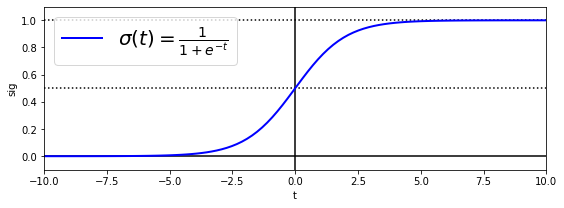

In [26]:
#Generamos 100 puntos igualmente distribuidos entre -100 y 100
t = np.linspace(-10, 10, 100)
#calculamos la función sigmoidea o logit para estos puntos
sig = 1 / (1 + np.exp(-t))
#Generamos el marco del gráfico para que se puedan identificar mejor los puntos de interés
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
#representamos t en el eje X y sig en el eje y
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.ylabel("sig")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

##Entrenamiento del modelo de Regresión Logística

Ajustamos el modelo al conjunto de entrenamiento.

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Obtenemos las predicciones para el conjunto de test, así como las probabilidades de pertenecer a una clase u otra

In [28]:
# Predicción de los datos test
y_pred = classifier.predict(X_test)
# Predicción de las probabiliades
probs_y=classifier.predict_proba(X_test)

In [31]:
#Combinamos predicciones con probabilidades para una mejor comprensión
np.c_[y_pred, probs_y]

array([[0.00000000e+00, 9.98597786e-01, 1.40221408e-03],
       [0.00000000e+00, 9.89303613e-01, 1.06963870e-02],
       [1.00000000e+00, 4.96647615e-03, 9.95033524e-01],
       [0.00000000e+00, 9.99664397e-01, 3.35602587e-04],
       [1.00000000e+00, 2.37660987e-02, 9.76233901e-01],
       [0.00000000e+00, 9.98996826e-01, 1.00317364e-03],
       [1.00000000e+00, 1.86449954e-02, 9.81355005e-01],
       [0.00000000e+00, 9.90715380e-01, 9.28462001e-03],
       [0.00000000e+00, 9.95767632e-01, 4.23236768e-03],
       [0.00000000e+00, 9.75544405e-01, 2.44555946e-02],
       [0.00000000e+00, 9.97297364e-01, 2.70263578e-03],
       [0.00000000e+00, 9.79565939e-01, 2.04340611e-02],
       [0.00000000e+00, 9.84399783e-01, 1.56002168e-02],
       [0.00000000e+00, 9.94061021e-01, 5.93897936e-03],
       [0.00000000e+00, 9.86412914e-01, 1.35870860e-02],
       [1.00000000e+00, 9.50549392e-03, 9.90494506e-01],
       [0.00000000e+00, 9.84921954e-01, 1.50780455e-02],
       [0.00000000e+00, 9.75333

Calculamos el accuracy medio para los datos de test.

In [32]:
classifier.score(X_test,y_test)

1.0

Obtenemos la matriz de confusión.

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[25,  0],
       [ 0, 13]])

Por la matriz de confusión podemos deducir que no hay ningún error en la clasificación y esto no es lo normal, ya que, habitualmente nuestros datos suelen contener ruido provocando que algunas observaciones sean  clasificadas de manera errónea.

Este fenómeno puede haber sido debido a la suerte, es decir, puede haberse dado la casualidad de que justo para la partición que hemos hecho de train y test los resultados sean perfectos, pero que ante nuevos datos el resultado puede ser diferente (sobreajuste a los datos de entrenamiento).

Para evitar esto, se suele recurrir a la validación cruzada o **crossvalidation**, la cual sirve para dar una estimación más robusta del accuracy de nuestro modelo. Para ello, se divide nuestro conjunto de entrenamiento en k grupos, y se emplean k-1 grupos para ajustar el modelo y el restante para evaluar el accuracy. Este proceso se repite iterativamente hasta que cada uno de los k grupos ha sido empleado para evaluar el scoring del modelo. Este procedimiento se muestra de manera sencilla en la siguiente imagen:


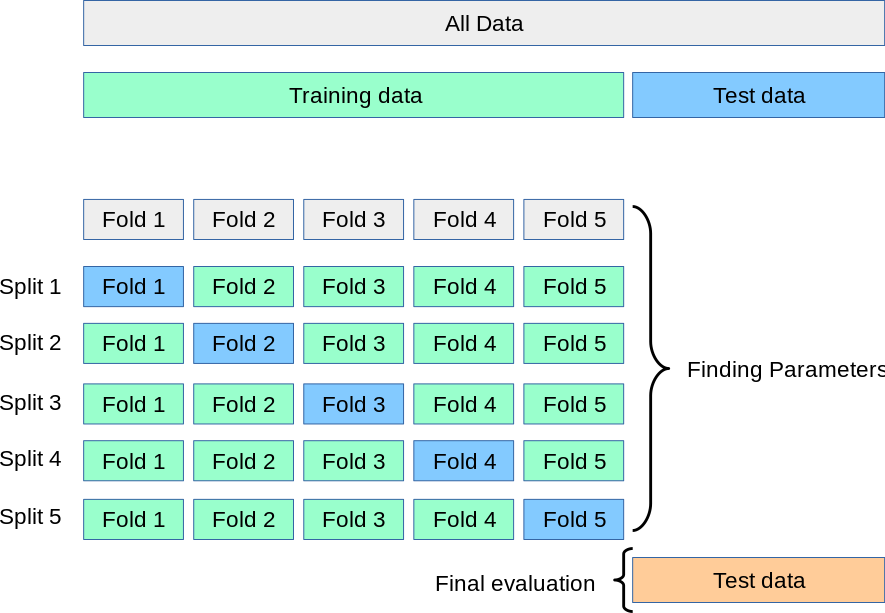

In [34]:
from sklearn.model_selection import cross_val_score
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
scores = cross_val_score(classifier, X_train, y_train, cv=5)
#scores contiene el accuracy para cada uno de los k folds
scores

array([1., 1., 1., 1., 1.])

In [35]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


Es decir, en todos los subconjuntos se obtiene un accuracy de 1.

En las anteriores celdas, os hemos mostrado como implementar crossvalidation de manera genérica. Sin embargo, existen algunas implementaciones de los algoritmos que vienen con esta técnica ya implementada, como es el caso de *LogisticRegressionCV()*, vamos a ver cómo se haría para este caso.

In [36]:
from sklearn.linear_model import LogisticRegressionCV
#En una sola línea definimos el modelo y lo entrenamos empleando crossvalidation
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)

En este caso los datos los obtenemos ya agregados para todos los KFolds

In [37]:
print("El modelo tienen un %0.2f accuracy " % (clf.score(X_test, y_test)))

El modelo tienen un 1.00 accuracy 


Podemos obtener también las métricas para observaciones individualizadas, así como la matriz de confusión.

In [38]:
from sklearn.metrics import confusion_matrix
print(clf.score(X_test, y_test))
print(clf.predict(X_test[:2, :]))
print(clf.predict_proba(X_test[:2, :]))
print(confusion_matrix(y_test, y_pred))

1.0
[0 0]
[[0.93817036 0.06182964]
 [0.87521185 0.12478815]]
[[25  0]
 [ 0 13]]


##Representación gráfica de la frontera de decisión

Para la  visualización de la frontera de decisión, imaginemos que tenemos un nuevo ejemplo, en el que a partir de una única una variable independiente o atributo (*petal_width*), queremos predecir si una flor es de tipo Virginica o no.

Definimos inicialmente los conjuntos.

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
X = iris["data"][:,3:]  # Seleccionamos solo los datos del atributo que nos interesa: petal width
#Recodificamos:
# 1 -> Virginica
# 0 -> Resto
y = (iris["target"] == 2).astype(np.int64)  

In [41]:
np.unique(y, return_counts=True) # Tenemos 100 observaciones de la clase 0 (Resto) y 50 de la clase 1 (Virginica)

(array([0, 1]), array([100,  50]))

In [42]:
# Hacemos el ajuste
#log_reg = LogisticRegression(solver="liblinear", penalty="l2",random_state=42)
#log_reg = LogisticRegression(solver="liblinear", penalty="l1",random_state=42)
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X,y)

LogisticRegression(random_state=42)

In [43]:
#Creamos mil datos ficticios nuevos, para los que queremos obtener sus predicciones
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

Dibujamos las probabilidades estimadas en base a diferentes valores de la variable *petal width*.

Para ello primero realizamos una función que reciba como input la frontera de decisión y lo represente junto la función logit para cada una de las clases.

In [45]:
def plot_decission_bound(decision_boundary):
  plt.figure(figsize=(10,6))
  plt.plot(X[y==0], y[y==0], "bs")
  plt.plot(X[y==1], y[y==1], "g^")
  plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
  plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Virginica")
  plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Virginica")
  plt.text(decision_boundary+0.02, 0.15, "Frontera decisión", fontsize=14, color="k", ha="center")
  plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
  plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
  plt.xlabel("Petal width (cm)", fontsize=14)
  plt.ylabel("Probability", fontsize=14)
  plt.legend(loc="center left", fontsize=14)
  plt.axis([0, 3, -0.02, 1.02])
  
  return plt.show()

Si la frontera de deción es 0.5, obtenemos lo siguiente

Valor frontera de decisión:  1.6606606606606606


/usr/local/lib/python3.8/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


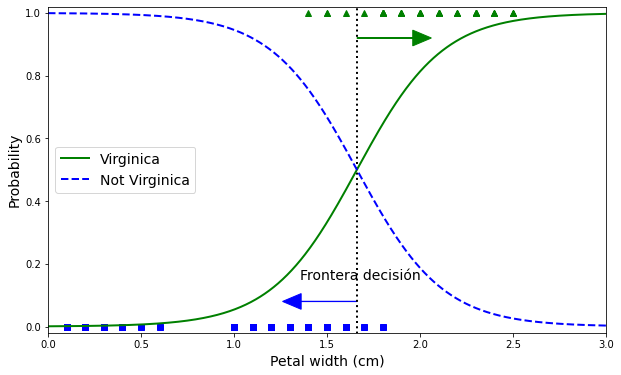

In [46]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
print("Valor frontera de decisión: ", decision_boundary[0])
plot_decission_bound(decision_boundary)

En cambio, si queremos garantizar que las observaciones que no son Virginica siempre las clasificamos bien, subimos el decisión boundary a 0.7

/usr/local/lib/python3.8/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


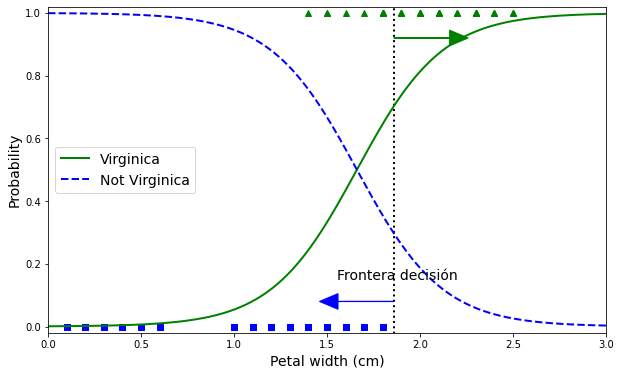

In [47]:
decision_boundary_2 = X_new[y_proba[:, 1] >= 0.7][0]

plot_decission_bound(decision_boundary_2)